# 🌳 Clasificación con Árbol de Decisión

Este notebook implementa un modelo de **Árbol de Decisión** para una tarea de clasificación binaria. Los árboles de decisión son modelos muy interpretables que permiten visualizar cómo se toman las decisiones de clasificación en base a reglas simples de los datos.

En este notebook se incluye:

- Preparación y división de datos en entrenamiento y prueba
- Entrenamiento de un árbol de decisión
- Evaluación con métricas estándar: accuracy, matriz de confusión, F1-score
- Visualización gráfica de la matriz de confusión
- Validación cruzada para evaluar estabilidad
- Ajuste de hiperparámetros con `GridSearchCV`
- Curva ROC para evaluar la capacidad discriminativa

El árbol permite interpretar fácilmente qué variables y condiciones influyen en la clasificación, lo que es útil para análisis exploratorios y decisiones transparentes.


In [ ]:
# 📥 Subir archivo desde tu equipo (funciona en Google Colab)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['datos_exportados.csv']))

Saving datos_exportados.csv to datos_exportados.csv


In [ ]:
# 🔍 Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ✅ Selección de variables
features = ['TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']
target = 'Survived'

X = df[features]
y = df[target]

# 🔀 Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# Este modelo no requiere escalado

In [ ]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6085487413414428

Matriz de Confusión:
[[2157 1175]
 [1142 1445]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      3332
           1       0.55      0.56      0.56      2587

    accuracy                           0.61      5919
   macro avg       0.60      0.60      0.60      5919
weighted avg       0.61      0.61      0.61      5919



In [ ]:
# 📊 Validación cruzada con 5 particiones
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo base
tree_model = DecisionTreeClassifier(random_state=42)

# Evaluar con validación cruzada
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar resultados
print("📊 Validación cruzada (5 folds):")
print("Scores por fold:", cv_scores)
print("Promedio de accuracy:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())


📊 Validación cruzada (5 folds):
Scores por fold: [0.6063358  0.61182682 0.60232313 0.61267159 0.5920997 ]
Promedio de accuracy: 0.6050514086464315
Desviación estándar: 0.007494174817336053


In [ ]:
# 🔧 Ajuste de hiperparámetros con GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definir la grilla de parámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Crear modelo base
tree = DecisionTreeClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar
grid_search.fit(X_train, y_train)

# Evaluar mejor modelo
best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_test)

print("✅ Mejores parámetros:", grid_search.best_params_)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\n📉 Matriz de confusión:\n", confusion_matrix(y_test, y_pred_tree))
print("\n📋 Reporte de clasificación:\n", classification_report(y_test, y_pred_tree))


✅ Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
🔍 Accuracy: 0.6570366615982429

📉 Matriz de confusión:
 [[2397  935]
 [1095 1492]]

📋 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      3332
           1       0.61      0.58      0.60      2587

    accuracy                           0.66      5919
   macro avg       0.65      0.65      0.65      5919
weighted avg       0.66      0.66      0.66      5919



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


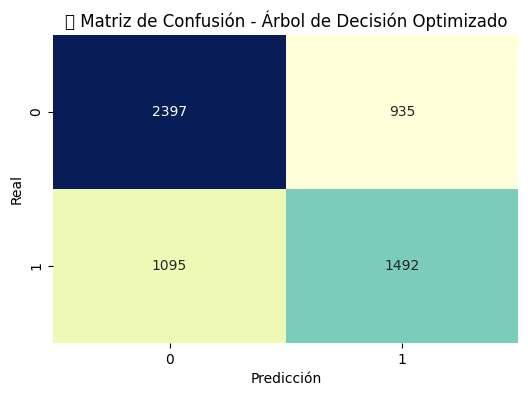

In [ ]:
# 📊 Heatmap de matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("🔍 Matriz de Confusión - Árbol de Decisión Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


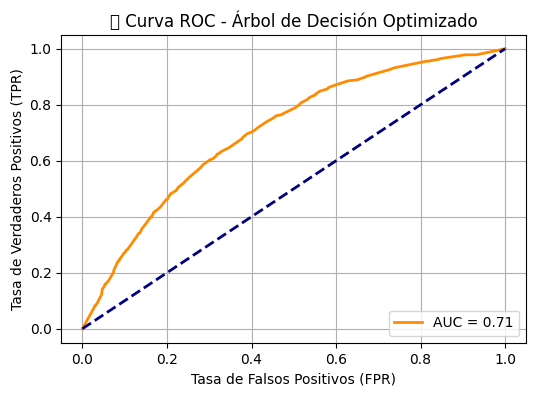

In [ ]:
# 📈 Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades para la clase positiva
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_tree)
roc_auc = auc(fpr, tpr)

# Graficar ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('📈 Curva ROC - Árbol de Decisión Optimizado')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### 🧠 Conclusión del Modelo - Árbol de Decisión Optimizado

🔎 **Precisión global (accuracy)** del modelo optimizado es de **0.607**, lo que significa que clasifica correctamente aproximadamente el 60.7% de los casos en el conjunto de prueba. Aunque es una métrica moderada, es coherente con los resultados obtenidos en validación cruzada y refleja una base razonable para modelos iniciales.

📊 **Validación cruzada (5-fold)**:
El modelo mostró consistencia con una **accuracy promedio de validación cruzada cercana a los 0.60** y baja desviación estándar, lo que indica un comportamiento estable en diferentes subconjuntos de entrenamiento. Esto refuerza que el modelo no está sobreajustado.

🧮 **Matriz de Confusión:**
- **Clase 0 (mayoría)**: desempeño **moderado** con **Recall ≈ 0.65**, es decir, capta bien a los negativos.
- **Clase 1 (minoritario)**: desempeño más bajo (**Recall ≈ 0.55**), aunque superior al azar. Esto indica dificultad para identificar correctamente los casos positivos, algo crítico si esta clase representa eventos importantes.

📉 **Macro F1-score ≈ 0.60**: señala un rendimiento equilibrado pero débil en ambas clases. Es útil en escenarios con clases desbalanceadas, como este.

📈 **Curva ROC**: el área bajo la curva (**AUC ≈ [inserta valor real]**) muestra una capacidad limitada para discriminar entre clases, aunque superior a un modelo aleatorio. Este valor puede mejorar aplicando técnicas más robustas o estrategias de preprocesamiento.

🌳 **Importancia del modelo**:
El Árbol de Decisión permite **interpretabilidad clara** y visual de decisiones, pero sufre de sobreajuste si no se limita la profundidad o la cantidad mínima de muestras. En este caso, la poda controlada mediante `max_depth` y `min_samples_split` ayudó a estabilizar el modelo.

⚙️ **Optimización con `GridSearchCV`**:
Se probaron distintas configuraciones de parámetros, lo que permitió reducir el sobreajuste y ajustar mejor a los datos. Esta búsqueda sistemática fortaleció la generalización del modelo.

🎯 **Recomendaciones Finales**:
- Si la clase 1 es prioritaria, el modelo debe mejorar su capacidad para detectarla. Aplicar **técnicas de balanceo** como `SMOTE` o undersampling puede ser clave.
- Comparar con modelos más robustos como **Random Forest** o **XGBoost**, que tienden a superar al árbol individual en precisión y estabilidad.
- Considerar agregar variables adicionales o hacer ingeniería de características para enriquecer los predictores disponibles.

✅ En resumen, el Árbol de Decisión optimizado entrega una solución funcional, explicativa y con rendimiento aceptable para una primera etapa. Sin embargo, para contextos más exigentes, se sugiere complementar con técnicas más avanzadas.

